In [82]:
#Loading required libraries
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats 
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [83]:
#Setting Path to directory
os.getcwd()
os.chdir("C:/Users/Rupak/Desktop/edwisor/Project")
os.getcwd()

'C:\\Users\\Rupak\\Desktop\\edwisor\\Project'

In [84]:
#Fetching csv file and checking
bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [132]:
#bike.csv statistics metrics
bike.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
#bike.csv datatypes
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [85]:
#Replacing some variables with some meaningful values
bike['season'] = bike['season'].replace([1,2,3,4],["Spring","Summer","Fall","Winter"])
bike['yr'] = bike['yr'].replace([0,1],["2011","2012"])
bike['holiday'] = bike['holiday'].replace([0,1],["No holiday","Holiday"])
bike['weathersit'] = bike['weathersit'].replace([1,2,3,4],["Clear","Partly Cloudy, Mist","Light rain, Cloudy","Heavy rain"])
bike['workingday'] = bike['workingday'].replace([0,1],["No Working day","Working day"])
bike['weathersit'] = bike['weathersit'].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

In [86]:
#Converting into Categorical type
bike['weathersit'] = bike['weathersit'].astype('category')
bike['holiday'] = bike['holiday'].astype('category')
bike['yr'] = bike['yr'].astype('category')
bike['season'] = bike['season'].astype('category')
bike['workingday'] = bike['workingday'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')
bike['mnth'] = bike['mnth'].astype('category')

In [8]:
#Missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

C:\Users\Rupak\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rupak\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


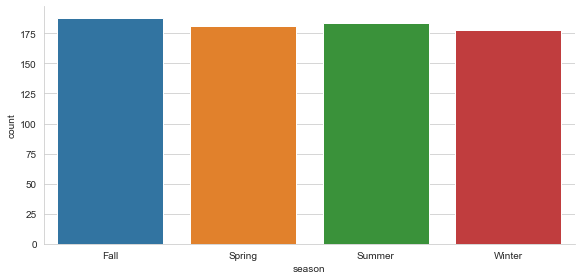

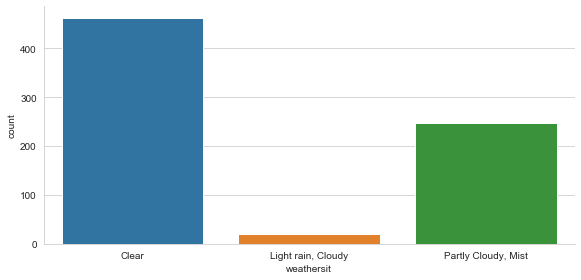

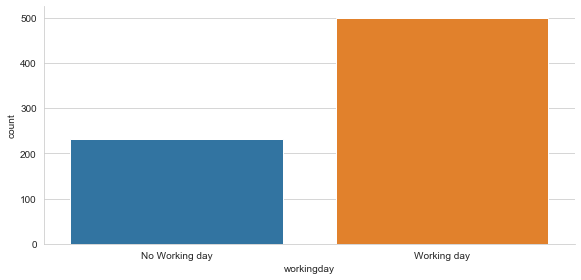

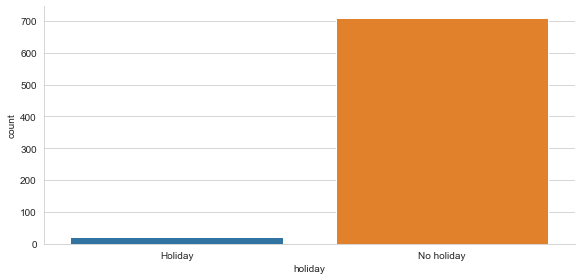

In [7]:
#Exploring some categorical variable
sns.set_style("whitegrid")
sns.factorplot(data=bike, x='season', kind= 'count',size=4,aspect=2)
sns.factorplot(data=bike, x='weathersit', kind= 'count',size=4,aspect=2)
sns.factorplot(data=bike, x='workingday', kind= 'count',size=4,aspect=2)
sns.factorplot(data=bike, x='holiday', kind= 'count',size=4,aspect=2)

Text(0.5, 1.0, 'Temperature Distribution')

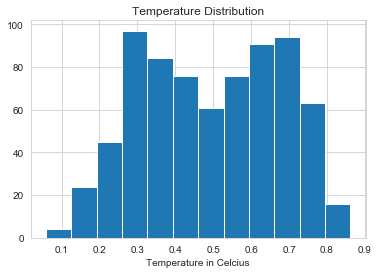

In [10]:
#Distribution of numerical data using histogram
plt.hist(data=bike, x='temp', bins='auto', label='Temperature')
plt.xlabel('Temperature in Celcius')
plt.title("Temperature Distribution")

Text(0.5, 1.0, 'Humidity Distribution')

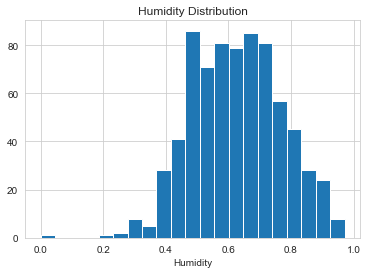

In [47]:
#Distribution of numerical data using histogram
plt.hist(data=bike, x='hum', bins='auto', label='Temperature')
plt.xlabel('Humidity')
plt.title("Humidity Distribution")

Text(0.5, 1.0, 'Windspeed Distribution')

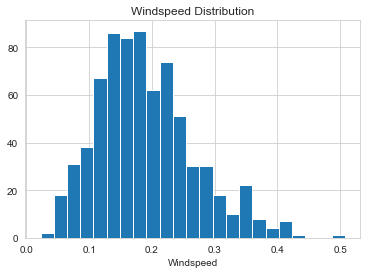

In [14]:
#Distribution of numerical data using histogram
plt.hist(data=bike, x='windspeed', bins='auto', label='Temperature')
plt.xlabel('Windspeed')
plt.title("Windspeed Distribution")

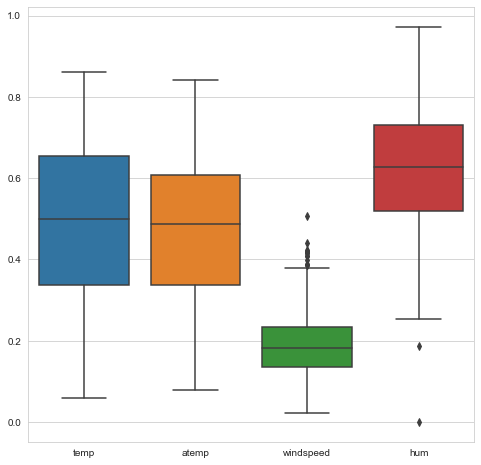

In [53]:
#Using Boxplot for outliers
sns.boxplot(data=bike[['temp','atemp','windspeed','hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [87]:
#Making copy of original csv
new_bike = bike.copy()
new_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,No holiday,6,No Working day,"Partly Cloudy, Mist",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,No holiday,0,No Working day,"Partly Cloudy, Mist",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,No holiday,1,Working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,No holiday,2,Working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,No holiday,3,Working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [88]:
#Removing outliers in Humidity using IQR
q75, q25 = np.percentile(new_bike['hum'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)


0.7302085 0.52
0.21020850000000002
0.20468725
1.0455212500000002


In [89]:
#Displaying outliers in humidity
new_bike[(new_bike.hum < min) | (new_bike.hum > max)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,Spring,2011,2,No holiday,6,No Working day,Clear,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,Spring,2011,3,No holiday,4,Working day,"Light rain, Cloudy",0.389091,0.385668,0.000000,0.261877,46,577,623


In [90]:
#Removing outliers from humidity
new_bike.drop(new_bike[(new_bike.hum > max) | (new_bike.hum < min) ].index , inplace=True)

In [91]:
#Removeing outliers in Windspeed
q75, q25 = np.percentile(new_bike['windspeed'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

0.233204 0.13495
0.09825400000000001
-0.012431000000000025
0.380585


In [92]:
#Displaying outliers in windspeed
new_bike[(new_bike.windspeed < min) | (new_bike.windspeed > max)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
44,45,2011-02-14,Spring,2011,2,No holiday,1,Working day,Clear,0.415000,0.398350,0.375833,0.417908,208,1705,1913
93,94,2011-04-04,Summer,2011,4,No holiday,1,Working day,Clear,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,Summer,2011,4,No holiday,2,Working day,"Partly Cloudy, Mist",0.414167,0.398350,0.642083,0.388067,167,1628,1795
292,293,2011-10-20,Winter,2011,10,No holiday,4,Working day,Clear,0.475833,0.466525,0.636250,0.422275,471,3724,4195
382,383,2012-01-18,Spring,2012,1,No holiday,3,Working day,Clear,0.303333,0.275254,0.443333,0.415429,109,3267,3376
407,408,2012-02-12,Spring,2012,2,No holiday,0,No Working day,Clear,0.127500,0.101658,0.464583,0.409212,73,1456,1529
420,421,2012-02-25,Spring,2012,2,No holiday,6,No Working day,Clear,0.290833,0.255675,0.395833,0.421642,317,2415,2732
432,433,2012-03-08,Spring,2012,3,No holiday,4,Working day,Clear,0.527500,0.524604,0.567500,0.441563,486,4896,5382
433,434,2012-03-09,Spring,2012,3,No holiday,5,Working day,"Partly Cloudy, Mist",0.410833,0.397083,0.407083,0.414800,447,4122,4569
450,451,2012-03-26,Summer,2012,3,No holiday,1,Working day,Clear,0.445833,0.438750,0.477917,0.386821,795,4763,5558


In [93]:
#Removing outliers from windspeed
new_bike.drop(new_bike[ (new_bike.windspeed > max) | (new_bike.windspeed < min) ].index , inplace=True)

In [94]:
#Checking the dimensions after removing outliers
new_bike.shape

(717, 16)

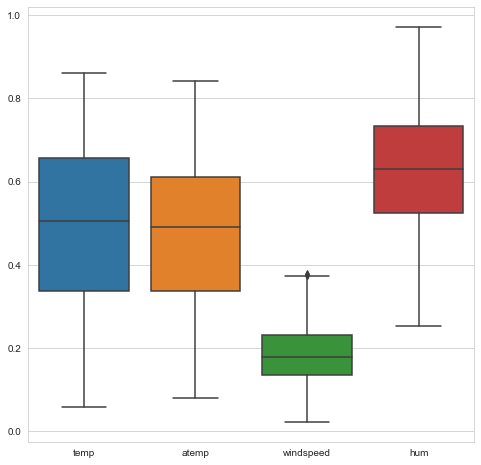

In [16]:
#Seeing effect on boxplot after removing outliers
sns.boxplot(data=new_bike[['temp','atemp','windspeed','hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

Text(0, 0.5, 'Count of bikes')

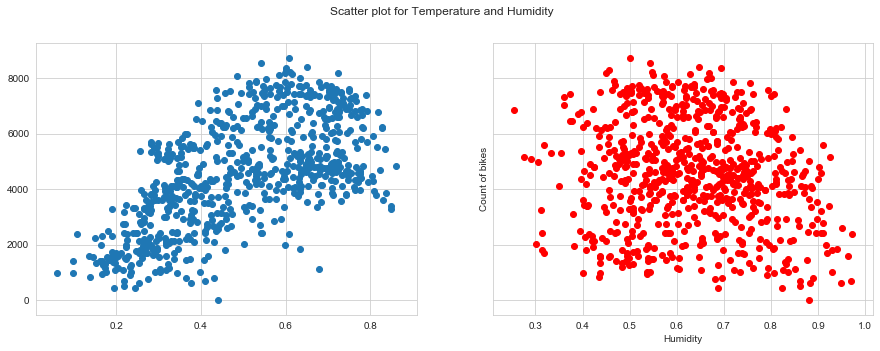

In [95]:
#Distribution of Temperature and Humdity against Bike rental count using scatter plot
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=new_bike, x='temp', y='cnt')
axs[1].scatter(data=new_bike, x='hum', y='cnt', color = 'red')
fig.suptitle('Scatter plot for Temperature and Humidity')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

In [17]:
#Correlation matrix
new_bike.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.0,0.15,0.16,7.5e-05,-0.11,0.28,0.66,0.63
temp,0.15,1.0,0.99,0.11,-0.14,0.54,0.54,0.63
atemp,0.16,0.99,1.0,0.13,-0.17,0.54,0.54,0.63
hum,7.5e-05,0.11,0.13,1.0,-0.2,-0.1,-0.12,-0.14
windspeed,-0.11,-0.14,-0.17,-0.2,1.0,-0.15,-0.2,-0.22
casual,0.28,0.54,0.54,-0.1,-0.15,1.0,0.39,0.67
registered,0.66,0.54,0.54,-0.12,-0.2,0.39,1.0,0.94
cnt,0.63,0.63,0.63,-0.14,-0.22,0.67,0.94,1.0


In [95]:
#Dividing  Test and train data  using skilearn 

bike_features = new_bike.drop(['atemp','hum'],axis = 1)
bike_features.shape

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(bike_features, test_size=0.2)

In [96]:
train_data.head()
test_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
229,230,2011-08-18,Fall,2011,8,No holiday,4,Working day,Clear,0.711667,0.233208,639,3166,3805
171,172,2011-06-21,Fall,2011,6,No holiday,2,Working day,"Partly Cloudy, Mist",0.680833,0.171025,774,4061,4835
726,727,2012-12-27,Spring,2012,12,No holiday,4,Working day,"Partly Cloudy, Mist",0.254167,0.350133,247,1867,2114
81,82,2011-03-23,Summer,2011,3,No holiday,3,Working day,"Partly Cloudy, Mist",0.346957,0.234261,203,1918,2121
138,139,2011-05-19,Summer,2011,5,No holiday,4,Working day,"Partly Cloudy, Mist",0.530833,0.108213,735,3840,4575


In [67]:
#Preapring train and test data for Linear Regression
#Create continuous data. Save target variable first
train_c = train_data[['cnt','temp','windspeed']]
test_c = test_data[['cnt','temp','windspeed']]

In [68]:
#Getting dummies of categorical variables(necessary for ols model)
cat_var = ["season", "yr", "mnth", "weekday", "workingday", "weathersit"]

for i in cat_var:
    var1 = pd.get_dummies(train_data[i], prefix = i)
    var2 = pd.get_dummies(test_data[i], prefix = i)
    train_c = train_c.join(var1)
    test_c = test_c.join(var2)

In [69]:
train_c.head()

,cnt,temp,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,yr_2011,yr_2012,mnth_1,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_No Working day,workingday_Working day,weathersit_Clear,"weathersit_Light rain, Cloudy","weathersit_Partly Cloudy, Mist"
194,5084,0.680833,0.240667,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
710,5501,0.353333,0.296037,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
609,6140,0.753333,0.113187,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
205,3840,0.743333,0.090808,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
130,4182,0.542500,0.120642,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0


In [133]:
#Linear regression model implementation
#MAPE : 1.42
#Accuracy :
#F-static : 112.8
import statsmodels.api as sm
ols_model = sm.OLS(train_c.iloc[:,0], train_c.iloc[:,1:33]).fit()

In [134]:
#summary of model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sun, 08 Dec 2019   Prob (F-statistic):          1.80e-200
Time:                        23:49:50   Log-Likelihood:                -4603.1
No. Observations:                 573   AIC:                             9260.
Df Residuals:                     546   BIC:                             9378.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
temp                            3685.2822    448.447      8.218      0.000    2804.390    4566.174
windspeed                      -1604.2100    489.636     -3.276      0.001   -2566.010    -642.410
season_Fall                      307.7399    146.066      2.107      0.036      20.821     594.659
season_Spring                   -542.4259    139.406     -3.891      0.000    -816.263    -268.588
season_Summer                    252.2081    135.310      1.864      0.063     -13.583     518.000
season_Winter                   1150.8417    146.903      7.834      0.000     862.277    1439.407
yr_2011                         -470.1307     76.368     -6.156      0.000    -620.143    -320.119
yr_2012                         1638.4944     81.837     20.021      0.000    1477.740    1799.249
mnth_1                          -393.9433    198.522     -1.984      0.048    -783.904      -3.983
mnth_2                          -201.1395    187.898     -1.070      0.285    -570.231     167.952
mnth_3                           206.4957    145.961      1.415      0.158     -80.218     493.209
mnth_4                           336.0597    172.809      1.945      0.052      -3.391     675.511
mnth_5                           638.7771    180.144      3.546      0.000     284.918     992.636
mnth_6                           572.2814    169.829      3.370      0.001     238.684     905.879
mnth_7                           -75.6822    203.590     -0.372      0.710    -475.598     324.234
mnth_8                           328.9760    192.817      1.706      0.089     -49.777     707.729
mnth_9                           680.0244    156.595      4.343      0.000     372.421     987.628
mnth_10                          182.6360    177.044      1.032      0.303    -165.136     530.408
mnth_11                         -592.0349    188.823     -3.135      0.002    -962.944    -221.126
mnth_12                         -514.0866    159.398     -3.225      0.001    -827.195    -200.978
weekday_0                        382.2882    147.652      2.589      0.010      92.253     672.324
weekday_1                        -92.1712     87.365     -1.055      0.292    -263.785      79.442
weekday_2                        -70.7584    103.297     -0.685      0.494    -273.666     132.150
weekday_3                          3.3197    102.622      0.032      0.974    -198.262     204.902
weekday_4                         67.8285    104.099      0.652      0.515    -136.655     272.312
weekday_5                        101.6702    100.955      1.007      0.314     -96.637     299.977
weekday_6                        776.1866    148.668      5.221      0.000     484.155    1068.218
workingday_No Working day        225.4137    130.152      1.732      0.084     -30.247     481.074
workingday_Wor

In [135]:
#Predict the results of test data
ols_prediction = ols_model.predict(test_c.iloc[:,1:33])

In [136]:
##Create a dataframe for actual values and predicted values
dataframe = pd.DataFrame({'actual': test_c.iloc[:,0], 'pred': ols_prediction})
dataframe.head()

,actual,pred
61,1685,2019.351466
311,4205,3800.817064
53,1917,1844.645006
474,6565,6414.151790
160,4586,5401.766551


In [137]:
#Calclulate MAPE
#Function for Mean Absolute Percentage Error
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual))
    return mape
MAPE(test_c.iloc[:,0],ols_prediction)
RMSE(test_target_feature,RF_predict_one)

1.425070398134083

In [111]:
#Importing Library for label encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Preparing data for Random forest algorithm by label encoding of Cat. Variables 
train_data['season'] = train_data['season'].cat.codes
train_data['yr'] = train_data['yr'].cat.codes
train_data['holiday'] = train_data['holiday'].cat.codes
train_data['workingday'] = train_data['workingday'].cat.codes
train_data['weathersit'] = train_data['weathersit'].cat.codes

In [128]:
test_data['season'] = test_data['season'].cat.codes
test_data['yr'] = test_data['yr'].cat.codes
test_data['holiday'] = test_data['holiday'].cat.codes
test_data['workingday'] = test_data['workingday'].cat.codes
test_data['weathersit'] = test_data['weathersit'].cat.codes

C:\Users\Rupak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rupak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rupak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [129]:
train_predictor1 = train_data[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target1 = train_data['cnt'].values

test_predictor1 = test_data[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target1 = test_data['cnt'].values

In [138]:
#Import library for RandomForestRegressor
#MAPE:0.022
#Accuracy
from sklearn.ensemble import RandomForestRegressor
randome_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_predictor1, train_target1)


NameError: name 'summary' is not defined

In [130]:
random_predict= randome_one.predict(test_predictor1)

In [131]:
MAPE(test_target1,random_predict)

0.0220110071659801